In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
def f(x):
    return 3*x**2 - 4*x + 5

In [3]:
f(3.0)

20.0

In [10]:
class Value:
    def __init__(self, data, _children=(), _op='', label=''):
        self.data = data
        self.grad = 0.0
        self._prev = set(_children)  # Previous nodes in the computation graph
        self._op = _op  # Operation that produced this value
        self.label = label  # Optional label for the value

    def __repr__(self):
        # Print out the value in a readable format
        return f"Value(data={self.data})"
    
    def __add__(self, other):
        return Value(self.data + other.data, _children=(self, other), _op='+')
    
    def __mul__(self, other):
        return Value(self.data * other.data, _children=(self, other), _op='*')

In [17]:
# Test basic operations of class
a = Value(2.0, label='a')
b = Value(-3.0, label='b')
c = Value(10.0, label='c')
e = a*b; e.label = 'e'
d = e+c; d.label = 'd'
f = Value(-2.0, label='f')
L = d*f; L.label = 'L'

In [12]:
from graphviz import Digraph

def trace(root):
    nodes, edges = set(), set()
    
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child, v))
                build(child)
    
    build(root)
    return nodes, edges

def draw_dot(root):
    dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'})
    nodes, edges = trace(root)
    for n in nodes:
        dot.node(str(id(n)), label="{ %s | data %.4f}" % (n.label, n.data), shape='record')
        if n._op:
            dot.node(str(id(n)) + n._op, label=n._op)
            dot.edge(str(id(n)) + n._op, str(id(n)))
    for a, b in edges:
        dot.edge(str(id(a)), str(id(b)) + b._op)
    return dot

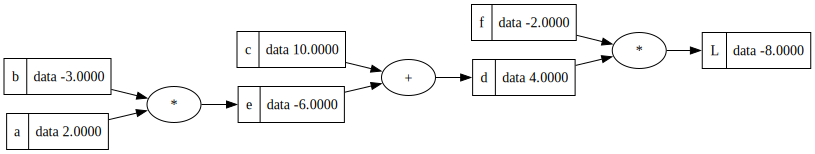

In [18]:
draw_dot(L)